In [28]:
import pandas as pd
#import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#!pip install pybaseball
#!pip install xgboost

### Load & Review Dataframes

In [183]:
#Starting with Mariners in 2021 (mariners_2021_y), load to train model
X = pd.read_csv(
    Path('./Resources/mariners_2021_X.csv'),
    index_col=[0],
)

y = pd.read_csv(
    Path('./Resources/mariners_2021_y.csv'),
    index_col=[0],
)

In [184]:
#Review dataframe
display(X)
display(y)

,Rank,Home_Away_@,Home_Away_Home,Opp_ARI,Opp_BAL,Opp_BOS,Opp_CHW,Opp_CLE,Opp_COL,Opp_DET,...,Opp_MIN,Opp_NYY,Opp_OAK,Opp_SDP,Opp_SFG,Opp_TBR,Opp_TEX,Opp_TOR,D/N_D,D/N_N
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
159,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
160,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
161,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


,W/L
1,1
2,0
3,1
4,0
5,0
...,...
158,1
159,1
160,0
161,1


### Split Data into Training and Testing Sets

In [185]:
# split data using test_train_split w/ random_state=1 and default test size of 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=1)

In [186]:
y_test.value_counts()

W/L
1      23
0      18
dtype: int64

### Normalize Data with StandardScaler

In [187]:
# Create the StandardScaler instance
X_scaler = StandardScaler()

In [188]:
# Fit the scaler to the features training dataset
X_scaler.fit(X_train)

StandardScaler()

In [189]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Logistic Regression Model

In [190]:
# Create a LogisticRegression Model with the original data

# Instantiate the Logistic Regression Model w/ random_state = 1
model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model = model.fit(X_train_scaled, y_train)

In [191]:
# Make predictions using testing data
y_pred = lr_model.predict(X_test_scaled)
# do we need training predictions if not doing a confusion matrix?


In [192]:
#Evaluation metrics
print(balanced_accuracy_score(y_test, y_pred))

0.5664251207729469


In [193]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[11,  7],
       [11, 12]], dtype=int64)

In [194]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  12
False Positive(FP) =  7
True Negative(TN) =  11
False Negative(FN) =  11


In [195]:
# Generate classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.61      0.55        18
           1       0.63      0.52      0.57        23

    accuracy                           0.56        41
   macro avg       0.57      0.57      0.56        41
weighted avg       0.57      0.56      0.56        41



### Predicting Mariners' 2022 Games

In [248]:
#load Mariners' dataset to feed into model
X_2022 = pd.read_csv(
    Path('./Resources/mariners_2022_X.csv'),
    index_col=[0],
)

y_2022 = pd.read_csv(
    Path('./Resources/mariners_2022_y.csv'),
    index_col=[0],
)

In [249]:
#Review dataframe
X_2022.head()

,Rank,Home_Away_@,Home_Away_Home,Opp_ATL,Opp_BAL,Opp_BOS,Opp_CHW,Opp_CLE,Opp_DET,Opp_HOU,...,Opp_NYY,Opp_OAK,Opp_PHI,Opp_SDP,Opp_TBR,Opp_TEX,Opp_TOR,Opp_WSN,D/N_D,D/N_N
1,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [250]:
#drop extra opponent to avoid 'ValueError: X has 25 features, but LogisticRegression is expecting 24 features as input.''
X_2022= X_2022.drop(columns=['Opp_WSN'])

In [251]:
# Fit the scaler to the features testing dataset
scaler = StandardScaler()
X_scaler = scaler.fit(X_2022)
X_2022_scaled = X_scaler.transform(X_2022)

In [252]:
# Make predictions using testing data
y_2022_pred = lr_model.predict(X_2022_scaled)

In [253]:
print(balanced_accuracy_score(y_2022, y_2022_pred))

0.5958333333333333


In [254]:
confusion_matrix(y_2022, y_2022_pred)

array([[33, 39],
       [24, 66]], dtype=int64)

In [255]:
TN, FP, FN, TP = confusion_matrix(y_2022, y_2022_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  66
False Positive(FP) =  39
True Negative(TN) =  33
False Negative(FN) =  24


In [256]:
print(classification_report(y_2022, y_2022_pred))

              precision    recall  f1-score   support

           0       0.58      0.46      0.51        72
           1       0.63      0.73      0.68        90

    accuracy                           0.61       162
   macro avg       0.60      0.60      0.59       162
weighted avg       0.61      0.61      0.60       162



### Mariners' 2021 Dataset Using XGBoost aka Extreme Gradient Boosting

In [257]:
# Instantiate XGBoost Model w/ random_state = 1
model = XGBClassifier(random_state=1)

In [258]:
# Fit the model using the scaled training data
XGBModel = model.fit(X_train_scaled, y_train)

In [259]:
# Make predictions for test data
y_pred = XGBModel.predict(X_test_scaled)

# convert prediction percentages to binary
predictions = [round(value) for value in y_pred]

In [260]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.5609756097560976

In [261]:
# Generate confusion matrix
confusion_matrix(y_test, y_pred)

array([[ 9,  9],
       [ 9, 14]], dtype=int64)

In [262]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  14
False Positive(FP) =  9
True Negative(TN) =  9
False Negative(FN) =  9


In [263]:
# Generate classificaiton report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        18
           1       0.61      0.61      0.61        23

    accuracy                           0.56        41
   macro avg       0.55      0.55      0.55        41
weighted avg       0.56      0.56      0.56        41



### Predict Mariners' 2022 Games with XGBoost aka Extreme Gradient Boosting

In [264]:
# Make predictions for test data
y_2022_pred = XGBModel.predict(X_2022_scaled)

# convert prediction percentages to binary
predictions = [round(value) for value in y_2022_pred]

In [265]:
accuracy = accuracy_score(y_2022, predictions)
accuracy

0.5432098765432098

In [266]:
# Generate confusion matrix
confusion_matrix(y_2022, y_2022_pred)

array([[47, 25],
       [49, 41]], dtype=int64)

In [267]:
TN, FP, FN, TP = confusion_matrix(y_2022, y_2022_pred).ravel()
print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP) =  41
False Positive(FP) =  25
True Negative(TN) =  47
False Negative(FN) =  49


In [268]:
# Generate classificaiton report
print(classification_report(y_2022, y_2022_pred))

              precision    recall  f1-score   support

           0       0.49      0.65      0.56        72
           1       0.62      0.46      0.53        90

    accuracy                           0.54       162
   macro avg       0.56      0.55      0.54       162
weighted avg       0.56      0.54      0.54       162



## Model Initialization and for loop

In [269]:
# Initialize each binary classifier
models = {}
models['Logistic Regression'] = LogisticRegression(random_state=1)
models['XGBoost'] = XGBClassifier(random_state=1)

In [270]:
# Performance Eval
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # fit the classifier
    models[key].fit(X_train_scaled, y_train)
    
    # make predictions
    predictions = models[key].predict(X_test_scaled)
    
    # calculate metrics
    accuracy[key] = accuracy_score(y_test, predictions)
    precision[key] = precision_score(y_test, predictions)
    recall[key] = recall_score(y_test, predictions)

## Results of 2021 Training and Testing Sets

In [242]:
df_model = pd.DataFrame(index=models.keys(), columns=["Accuracy", "Precision", "Recall"])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.560976,0.631579,0.521739
XGBoost,0.560976,0.608696,0.608696


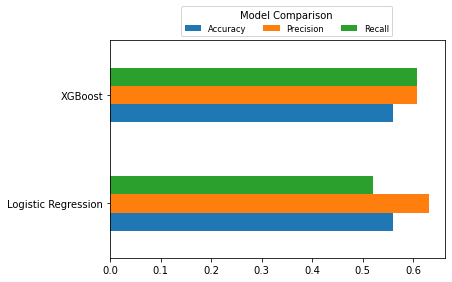

In [243]:
ax  = df_model.plot.barh()
ax.legend(
    ncol=3,
    title="Model Comparison",
    bbox_to_anchor=(.2,1),
    fontsize='small'
)

## Results of Predicting Mariners' 2022 Games

In [244]:
models = {}
models['Logistic Regression'] = LogisticRegression(random_state=1)
models['XGBoost'] = XGBClassifier(random_state=1)

In [245]:
# Performance Eval
accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # fit the classifier
    models[key].fit(X_train_scaled, y_train)
    
    # make predictions
    predictions = models[key].predict(X_2022_scaled)
    
    # calculate metrics
    accuracy[key] = accuracy_score(y_2022, predictions)
    precision[key] = precision_score(y_2022, predictions)
    recall[key] = recall_score(y_2022, predictions)

In [246]:
df_model = pd.DataFrame(index=models.keys(), columns=["Accuracy", "Precision", "Recall"])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.611111,0.628571,0.733333
XGBoost,0.543210,0.621212,0.455556


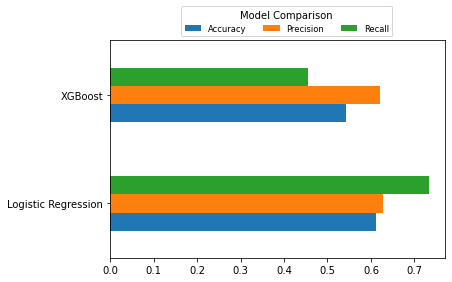

In [247]:
ax  = df_model.plot.barh()
ax.legend(
    ncol=3,
    title="Model Comparison",
    bbox_to_anchor=(.2,1),
    fontsize='small'
)